# Data generation for 2020-2023

This notebook has the objective of generating data for the regression model.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [83]:
dfIT = pd.read_csv('Data_04.csv')
dfIT=dfIT.set_index('date')
dfIT.index=pd.to_datetime(dfIT.index, format='%Y-%m-%d')

extra_months = 25
new_index = pd.date_range(start=dfIT.index[0], periods=len(dfIT) + extra_months, freq='MS')
dfIT = dfIT.reindex(new_index)

display(dfIT)

,ratio,Gas consumed Mm3,Gas consumed from stocks Mm3,Total Gas Stocks Mm3,Gas imported Mm3
2010-01-01,0.970427,7807.900832,NaN,8484.500000,7577.0
2010-02-01,1.092719,6460.947916,1520.357143,6964.142857,7060.0
2010-03-01,1.413511,5036.395372,676.738095,6287.404762,7119.0
2010-04-01,1.614520,3635.755361,-763.809524,7051.214286,5870.0
2010-05-01,1.641018,3412.516655,-1377.047619,8428.261905,5600.0
...,...,...,...,...,...
2023-09-01,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN,NaN


## Generating data via autocorrelations and analytics

### Autocorrelation for gas consumption

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  144
Model:             Restr. AutoReg(60)   Log Likelihood                -644.856
Method:               Conditional MLE   S.D. of innovations            522.132
Date:                Wed, 15 May 2024   AIC                           1307.712
Time:                        19:47:10   BIC                           1329.590
Sample:                            60   HQIC                          1316.507
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        462.3446    217.854      2.122      0.034      35.358     889.331
y.L1           0.2396      0.076      3.153      0.002       0.091       0.389
y.L2          -0.1075      0.054     -2.006      0.0

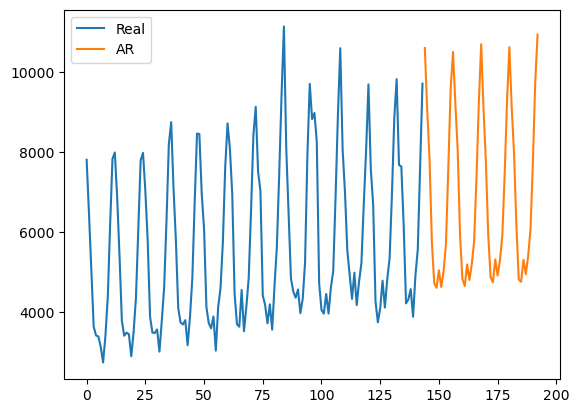

In [84]:
from statsmodels.tsa.ar_model import AutoReg

# train autoregression
Y=dfIT.values[:,1]
Y=Y[~np.isnan(Y)]
model = AutoReg(Y, lags=[1,2,12,24,36,48,60], missing='drop')
model_fit = model.fit()

a = np.empty(12*4)
a[:] = np.nan
Y = np.concatenate((Y,a))

forecast = model_fit.predict(start=len(Y[~np.isnan(Y)]), end=len(Y))

a = np.empty(len(Y[~np.isnan(Y)]))
a[:] = np.nan
forecast = np.concatenate((a,forecast))

print(model_fit.summary())
plt.plot(Y,label='Real')
plt.plot(forecast,label='AR')
plt.legend()

forecast = forecast[~np.isnan(forecast)]
forecast = forecast[:-1]

dfIT.loc[pd.date_range(start='2020-01-01', end='2023-12-01', freq='MS'),'Gas consumed Mm3'] = forecast

c:\Users\anton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Gas consumed Mm3'>

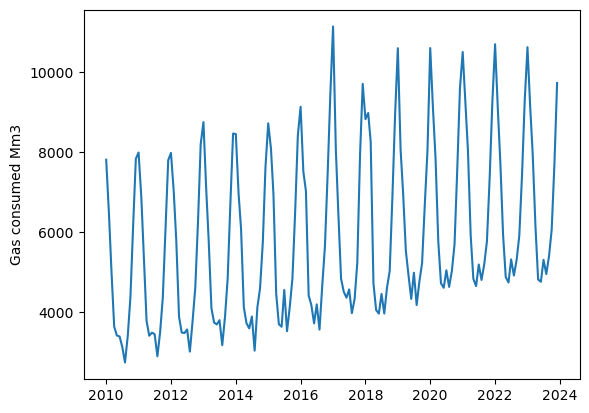

In [85]:
sb.lineplot(data=dfIT.loc[:,'Gas consumed Mm3'])

### Autocorrelation for total stocks

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  144
Model:             Restr. AutoReg(60)   Log Likelihood                -639.842
Method:               Conditional MLE   S.D. of innovations            491.876
Date:                Wed, 15 May 2024   AIC                           1297.684
Time:                        19:47:10   BIC                           1319.561
Sample:                            60   HQIC                          1306.478
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2453.0684    318.605      7.699      0.000    1828.615    3077.522
y.L1           1.1906      0.112     10.611      0.000       0.971       1.411
y.L2          -0.6938      0.066    -10.481      0.0

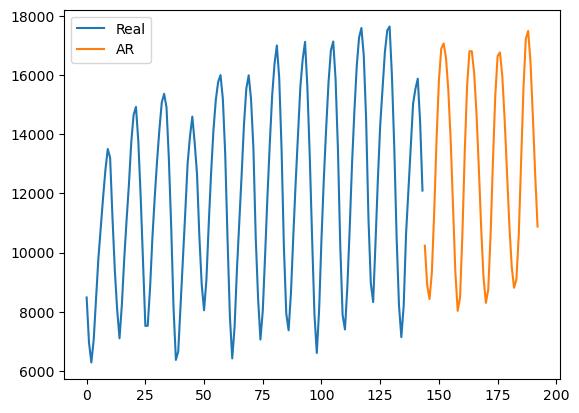

In [86]:
# train autoregression
Y=dfIT.values[:,3]
Y=Y[~np.isnan(Y)]
model = AutoReg(Y, lags=[1,2,12,24,36,48,60], missing='drop')
model_fit = model.fit()

a = np.empty(12*4)
a[:] = np.nan
Y = np.concatenate((Y,a))

forecast = model_fit.predict(start=len(Y[~np.isnan(Y)]), end=len(Y))

a = np.empty(len(Y[~np.isnan(Y)]))
a[:] = np.nan
forecast = np.concatenate((a,forecast))

print(model_fit.summary())
plt.plot(Y,label='Real')
plt.plot(forecast,label='AR')
plt.legend()

forecast = forecast[~np.isnan(forecast)]
forecast = forecast[:-1]

dfIT.loc[pd.date_range(start='2020-01-01', end='2023-12-01', freq='MS'),'Total Gas Stocks Mm3'] = forecast

Comment: Italian max storage capacity is orders of magnitude more than what is observed here, so growth of strategic stocks would not be impeded by this factor. Lower peaks may be due to a higher consumption of energy, on par with the other metric.

### Autocorrelation for ratio

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  144
Model:             Restr. AutoReg(60)   Log Likelihood                 110.949
Method:               Conditional MLE   S.D. of innovations              0.065
Date:                Wed, 15 May 2024   AIC                           -205.898
Time:                        19:47:10   BIC                           -186.452
Sample:                            60   HQIC                          -198.081
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0206      0.034      0.611      0.541      -0.046       0.087
y.L1           0.1474      0.072      2.058      0.040       0.007       0.288
y.L12          0.4422      0.089      4.971      0.0

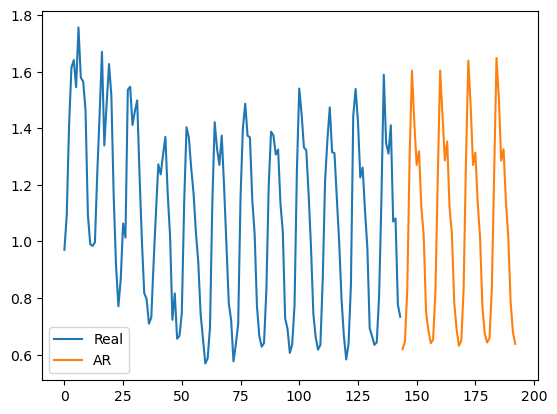

In [87]:
# train autoregression
Y=dfIT.values[:,0]
Y=Y[~np.isnan(Y)]

window = [1,12,24,26,48,60]
model = AutoReg(Y, lags=window, missing='drop')
model_fit = model.fit()

a = np.empty(12*4)
a[:] = np.nan
Y = np.concatenate((Y,a))

forecast = model_fit.predict(start=len(Y[~np.isnan(Y)]), end=len(Y))

a = np.empty(len(Y[~np.isnan(Y)]))
a[:] = np.nan
forecast = np.concatenate((a,forecast))

print(model_fit.summary())
plt.plot(Y,label='Real')
plt.plot(forecast,label='AR')
plt.legend()

forecast = forecast[~np.isnan(forecast)]
forecast = forecast[:-1]

dfIT.loc[pd.date_range(start='2020-01-01', end='2023-12-01', freq='MS'),'ratio'] = forecast

### Sine wave extension for ratio

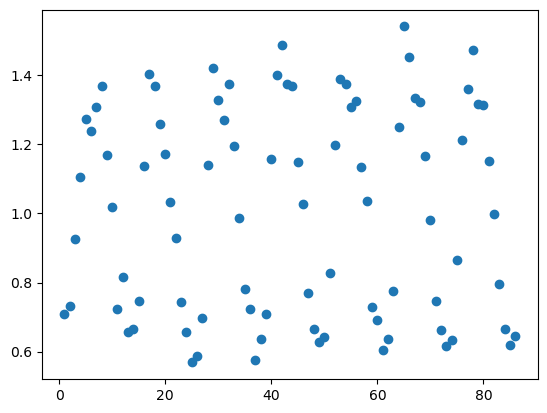

Amplitude=0.40, Angular freq.=0.52, phase=-1.94, offset=1.02, Max. Cov.=0.004503


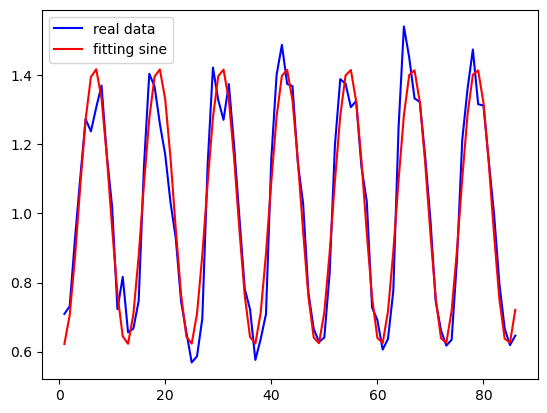

In [88]:
import numpy as np
import scipy.optimize

yy = dfIT.values[36:122,0]
yy=yy[~np.isnan(yy)]
tt = np.arange(1,len(yy)+1,1)

plt.scatter(tt, yy)
plt.show()

def fit_sin(tt, yy):
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1] - tt[0]))  # Assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:]) + 1])  # Exclude the zero frequency peak related to offset
    guess_amp = np.std(yy) * 2.0**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.0 * np.pi * guess_freq, 0.0, guess_offset])

    def sinfunc(t, A, w, p, c):
        return A * np.sin(w * t + p) + c

    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w / (2.0 * np.pi)
    fitfunc = lambda t: A * np.sin(w * t + p) + c
    return {
        "amp": A,
        "omega": w,
        "phase": p,
        "offset": c,
        "freq": f,
        "period": 1.0 / f,
        "fitfunc": fitfunc,
        "maxcov": np.max(pcov),
        "rawres": (guess, popt, pcov)
    }

def sinfunc(t, A, w, p, c):
        return A * np.sin(w * t + p) + c

res1 = fit_sin(tt, yy)
print(f"Amplitude={res1['amp']:.2f}, Angular freq.={res1['omega']:.2f}, phase={res1['phase']:.2f}, offset={res1['offset']:.2f}, Max. Cov.={res1['maxcov']:.6f}")

yy1 = sinfunc(tt, res1['amp'], res1['omega'], res1['phase'], res1['offset'])
plt.plot(tt, yy, "-b", label="real data")
plt.plot(tt, yy1, "-r", label="fitting sine")
plt.legend(loc="upper left")
plt.show()

## Generating all other features

In [89]:
#'ratio' autoestimator
dfIT['autoEstimator'] = dfIT['ratio']*dfIT['Gas consumed Mm3']

#Extracting features
dfIT['Month'] = dfIT.index.month
dfIT['sinMonth'] = (1 + np.sin((dfIT['Month']+2)/6*np.pi))/2 #January is numerically close to December

#Shifted features
dfIT['Gas consumed last month Mm3'] = dfIT['Gas consumed Mm3'].shift(1) # Gas consumed the last month
dfIT.loc[pd.to_datetime('2010-01-01',format="%Y-%m-%d"),'Gas consumed last month Mm3'] = dfIT.loc[pd.to_datetime('2010-02-01',format="%Y-%m-%d"),'Gas consumed Mm3']
dfIT['Gas imported last month Mm3'] = dfIT['Gas imported Mm3'].shift(1) # Gas imported the last month
dfIT.loc[pd.to_datetime('2010-01-01',format="%Y-%m-%d"),'Gas imported last month Mm3'] = dfIT.loc[pd.to_datetime('2010-02-01',format="%Y-%m-%d"),'Gas imported Mm3']

#Balance features
dfIT['Gas consumed from stocks Mm3'] = dfIT['Total Gas Stocks Mm3'].shift(1) - dfIT['Total Gas Stocks Mm3'] #Gas that exited the reserves in 1 month
dfIT.loc[pd.to_datetime('2010-01-01',format="%Y-%m-%d"),'Gas consumed from stocks Mm3'] = dfIT.loc[pd.to_datetime('2010-02-01',format="%Y-%m-%d"),'Gas consumed from stocks Mm3']
dfIT['Net new gas (appx) Mm3'] = dfIT['Gas consumed Mm3'] - dfIT['Gas consumed from stocks Mm3']
dfIT['Net new gas (appx) last month Mm3'] = dfIT['Net new gas (appx) Mm3'].shift(1)
dfIT.loc[pd.to_datetime('2010-01-01',format="%Y-%m-%d"),'Net new gas (appx) last month Mm3'] = dfIT.loc[pd.to_datetime('2010-02-01',format="%Y-%m-%d"),'Net new gas (appx) last month Mm3']

#ratio features
dfIT['sine_ratio1'] = sinfunc(dfIT['Month'], res1['amp'], res1['omega'], res1['phase'], res1['offset'])
dfIT['sinEstimator1'] = dfIT['Gas consumed Mm3']*dfIT['sine_ratio1']

#Generating columns for imported gas and similar features
dfIT.loc[pd.date_range(start=pd.to_datetime('2020-01-01',format="%Y-%m-%d"), end=dfIT.index[-1], freq='MS'),'Gas imported Mm3'] = np.nan

dfIT = dfIT.drop(columns=['Month','sinMonth','ratio','sine_ratio1'])

display(dfIT)

,Gas consumed Mm3,Gas consumed from stocks Mm3,Total Gas Stocks Mm3,Gas imported Mm3,autoEstimator,Gas consumed last month Mm3,Gas imported last month Mm3,Net new gas (appx) Mm3,Net new gas (appx) last month Mm3,sinEstimator1
2010-01-01,7807.900832,1520.357143,8484.500000,7577.0,7577.000000,6460.947916,7060.0,6287.543689,6287.543689,4858.295609
2010-02-01,6460.947916,1520.357143,6964.142857,7060.0,7060.000000,7807.900832,7577.0,4940.590773,6287.543689,4559.513013
2010-03-01,5036.395372,676.738095,6287.404762,7119.0,7119.000000,6460.947916,7060.0,4359.657277,4940.590773,4399.314246
2010-04-01,3635.755361,-763.809524,7051.214286,5870.0,5870.000000,5036.395372,7119.0,4399.564884,4359.657277,3928.626380
2010-05-01,3412.516655,-1377.047619,8428.261905,5600.0,5600.000000,3635.755361,5870.0,4789.564274,4399.564884,4338.082537
...,...,...,...,...,...,...,...,...,...,...
2023-09-01,5398.021051,-262.536662,17492.956789,NaN,6157.922378,4948.687876,NaN,5660.557713,6628.874357,6284.034378
2023-10-01,6065.221703,1059.117305,16433.839484,NaN,6161.428987,5398.021051,NaN,5006.104398,5660.557713,5804.387100
2023-11-01,7713.792492,1823.823013,14610.016471,NaN,6073.185065,6065.221703,NaN,5889.969479,5006.104398,5913.945813
2023-12-01,9729.065439,1983.139708,12626.876763,NaN,6593.865919,7713.792492,NaN,7745.925731,5889.969479,6268.392142


## Regressing imports

Bisogna adattare quanto sotto in modo da allenare il modello sui dati fino al 2019 e poi fargli fare il forecast sui dati dal 2020 in poi, problema: la feature 'Gas imported last month Mm3' dipende dal forecast fatto, infatti (la mia idea è per senso logico) dare il dato del gas che ha appena previsto per BUONO e generare il 'Gas imported last month' con questi dati. servirà un ciclo for o while dove eseguiamo il codice riga per riga.

In [90]:
from sklearn.model_selection import train_test_split

dfIT= dfIT.loc[dfIT.index <'2022-01-01']



Y=dfIT["Gas imported Mm3"].values                            #Identifying output Y
    
X=dfIT.drop(columns=["Gas imported Mm3"]).values             #Identifying input X

X_train, X_test, y_train, y_test = train_test_split(X,Y)
        

In [91]:

dfIT[dfIT.isnull().any(axis="columns")]

,Gas consumed Mm3,Gas consumed from stocks Mm3,Total Gas Stocks Mm3,Gas imported Mm3,autoEstimator,Gas consumed last month Mm3,Gas imported last month Mm3,Net new gas (appx) Mm3,Net new gas (appx) last month Mm3,sinEstimator1
2020-01-01,10601.619804,4282.594926,10236.238407,NaN,6562.431082,8044.000000,5363.0,6319.024878,5900.428571,6596.626167
2020-02-01,9087.578612,1329.596769,8906.641639,NaN,5874.023771,10601.619804,5651.0,7757.981843,6319.024878,6413.135268
2020-03-01,7838.824660,474.435248,8432.206390,NaN,6499.139858,9087.578612,4829.0,7364.389411,7757.981843,6847.248964
2020-04-01,5753.438975,-900.254068,9332.460458,NaN,7475.763017,7838.824660,5654.0,6653.693043,7364.389411,6216.895774
2020-05-01,4720.279330,-2054.460955,11386.921413,NaN,7569.379451,5753.438975,6164.0,6774.740285,6653.693043,6000.545463
2020-06-01,4605.250035,-2458.006193,13844.927606,NaN,6538.206788,4720.279330,5760.0,7063.256228,6774.740285,6421.112860
2020-07-01,5042.379858,-1976.897077,15821.824682,NaN,6405.827530,4605.250035,5831.0,7019.276935,7063.256228,7143.627959
2020-08-01,4628.291039,-1075.673901,16897.498584,NaN,6103.403478,5042.379858,5866.0,5703.964940,7019.276935,6166.964168
2020-09-01,5026.588391,-173.202925,17070.701508,NaN,5632.513626,4628.291039,5184.0,5199.791316,5703.964940,5851.635990
2020-10-01,5695.112148,475.935923,16594.765586,NaN,5813.682051,5026.588391,5348.0,5219.176226,5199.791316,5450.194091


In [92]:
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 200, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 20,
              'max_leaf_nodes': None}
RF_model = RandomForestRegressor(**parameters)
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

predictions = y_pred_RF

plt.plot(y_test[1:240])
plt.plot(y_pred_RF[1:240])
plt.show()
plt.scatter(y_test,y_pred_RF)

ValueError: Input y contains NaN.

In [ ]:
predictions = []

#questo mette le colonna 'imported gas' come prima colonna
dfIT.insert(0, 'Gas imported Mm3', df.pop('Gas imported Mm3'))

Y_predicted = dfIT.loc[pd.to_datetime('2020-01-01',format="%Y-%m-%d"),'Gas imported last month Mm3']

for date in pd.date_range(start=pd.to_datetime('2020-01-01',format="%Y-%m-%d"), end=dfIT.index[-1], freq='MS')

    dfIT.loc[date,'Gas imported last month Mm3'] = Y_predicted
    #Take inputs
    Z=dfIT.loc[date,:].values
    Y=Z[:,0]
    X=Z[:,1:]

    Y_predicted = NOMEDELMODELLO.predict(X)
    predictions.append(Y_predicted)


plt.plot(Y_predicted)
plt.show()

ValueError: params is required to have ndim 1 but has ndim 2